In [1]:
from tensorflow.keras import backend as K
K.clear_session()
!pip install rarfile
import os
import pandas as pd
import gdown
import rarfile
import shutil
from PIL import Image

#https://drive.google.com/file/d/1zJY1s03ZU_XmREVXCddtQkMoPCFn6i4F/view?usp=drive_link
#https://drive.google.com/file/d/1F58j1FE4F7cz1FR499pSwWkvTWquvRm4/view?usp=drive_link
#https://drive.google.com/file/d/1bs61vUinFyKL2SeZ_L04FNQs53eamj-d/view?usp=drive_link



url = 'https://drive.google.com/uc?id=1bs61vUinFyKL2SeZ_L04FNQs53eamj-d'
output_rar = '/content/Testing.rar'
gdown.download(url, output_rar, quiet=False)
# Extract the RAR file
with rarfile.RarFile(output_rar, 'r') as rar_ref:
    rar_ref.extractall('/content/dataset1/')
# Path to the extracted dataset folder
dataset_folder = '/content/Testing.rar'

Downloading...
From (original): https://drive.google.com/uc?id=1bs61vUinFyKL2SeZ_L04FNQs53eamj-d
From (redirected): https://drive.google.com/uc?id=1bs61vUinFyKL2SeZ_L04FNQs53eamj-d&confirm=t&uuid=5216727a-6fb7-451f-ae89-eb0a3ded4157
To: /content/Testing.rar
100%|██████████| 238M/238M [00:04<00:00, 56.7MB/s]


In [2]:
import os
import shutil
import random

# Input folder path containing images
input_folder = '/content/dataset1/Testing'
# Output folder paths
train_folder = '/content/fresh/train'
test_folder = '/content/fresh/test'



# Create output directories if they don't exist
os.makedirs(train_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)

# Function to split a folder while preserving subdirectories
def split_dataset(input_dir, train_dir, test_dir, split_ratio=0.8):
    for subfolder in os.listdir(input_dir):
        subfolder_path = os.path.join(input_dir, subfolder)
        if os.path.isdir(subfolder_path):
            # Create subfolders in train and test directories
            train_subfolder = os.path.join(train_dir, subfolder)
            test_subfolder = os.path.join(test_dir, subfolder)
            os.makedirs(train_subfolder, exist_ok=True)
            os.makedirs(test_subfolder, exist_ok=True)

            # Get all files in the subfolder
            files = [f for f in os.listdir(subfolder_path) if os.path.isfile(os.path.join(subfolder_path, f))]
            random.shuffle(files)  # Shuffle files for randomness

            # Calculate split index
            split_index = int(len(files) * split_ratio)

            # Split files into train and test
            train_files = files[:split_index]
            test_files = files[split_index:]

            # Copy files to respective folders
            for file in train_files:
                shutil.copy(os.path.join(subfolder_path, file), os.path.join(train_subfolder, file))
            for file in test_files:
                shutil.copy(os.path.join(subfolder_path, file), os.path.join(test_subfolder, file))

            print(f"Processed {subfolder}: {len(train_files)} train, {len(test_files)} test.")

# Perform the split
split_dataset(input_folder, train_folder, test_folder)
print("Dataset split completed.")


Processed in valid: 653 train, 164 test.
Processed Eyes: 3340 train, 836 test.
Dataset split completed.


Found 3993 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
94668760/94668760 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
51877672/51877672 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


500/500 ━━━━━━━━━━━━━━━━━━━━ 699s 706ms/step - accuracy: 0.9488 - loss: 5.1003 - val_accuracy: 1.0000 - val_loss: 2.4663 - learning_rate: 1.0000e-04
Epoch 2/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 118s 235ms/step - accuracy: 0.9960 - loss: 2.0901 - val_accuracy: 1.0000 - val_loss: 1.1784 - learning_rate: 1.0000e-04
Epoch 3/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 122s 244ms/step - accuracy: 0.9989 - loss: 0.9905 - val_accuracy: 1.0000 - val_loss: 0.5474 - learning_rate: 1.0000e-04
Epoch 4/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 142s 243ms/step - accuracy: 0.9994 - loss: 0.4615 - val_accuracy: 0.9200 - val_loss: 0.4262 - learning_rate: 1.0000e-04
Epoch 5/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 140s 239ms/step - accuracy: 0.9934 - loss: 0.2437 - val_accuracy: 0.9980 - val_loss: 0.1481 - learning_rate: 1.0000e-04
Epoch 6/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 123s 245ms/step - accuracy: 0.9992 - loss: 0.1293 - val_accuracy: 1.0000 - val_loss: 0.0845 - learning_rate: 1.0000e-04
Epoch 7/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 120s 239ms/

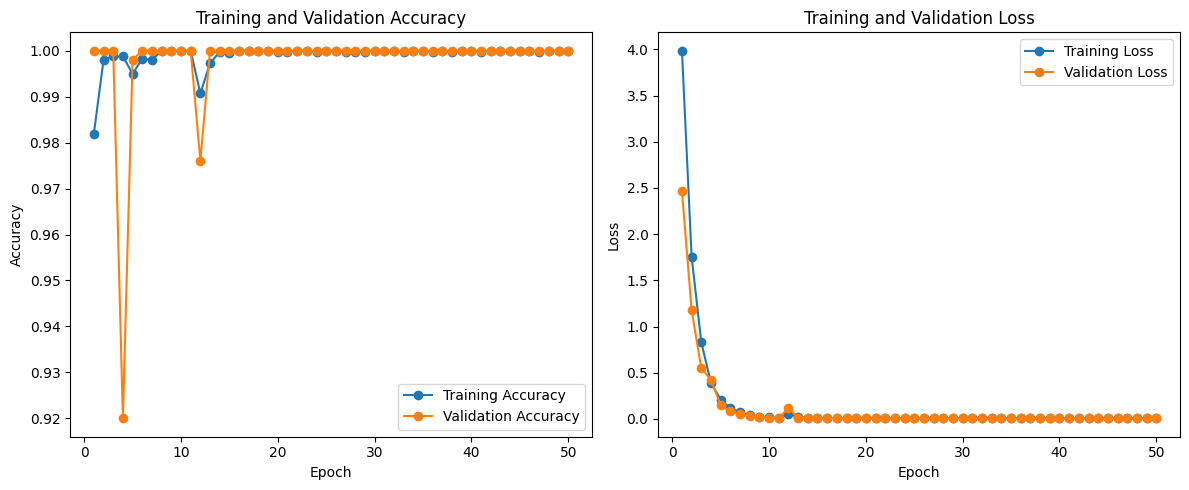

Saved model weights to /content/SDS_dataset/final_model_weights.weights.h5
125/125 ━━━━━━━━━━━━━━━━━━━━ 21s 46ms/step

Classification Report:
               precision    recall  f1-score   support

        Eyes       1.00      1.00      1.00       836
    in valid       1.00      1.00      1.00       164

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



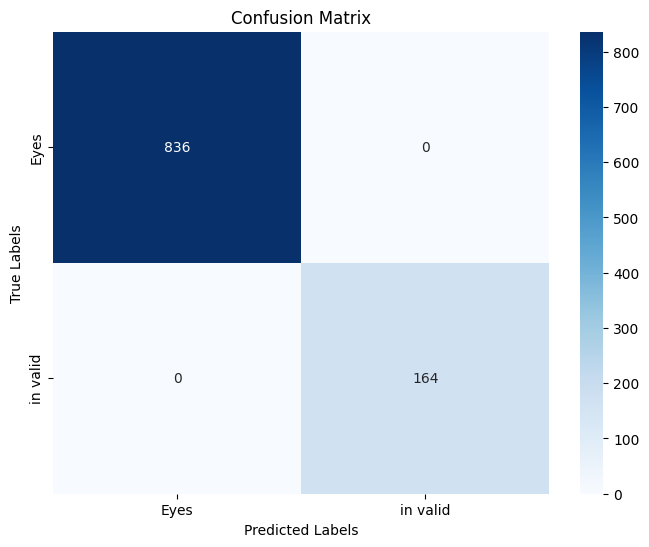

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import ResNet50V2, DenseNet169
from tensorflow.keras.layers import Input, Concatenate, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# ================================
# 1. Set Random Seeds for Reproducibility
# ================================
SEED = 42
tf.random.set_seed(SEED)
np.random.seed(SEED)

# ================================
# 2. Define Constants and Paths
# ================================
INPUT_SHAPE = (224, 224, 3)
BATCH_SIZE = 8  # Smaller batch size for better generalization
NUM_CLASSES = 2  # Change based on your dataset's number of classes
EPOCHS = 50
INITIAL_LR = 1e-4  # Reduced initial learning rate to avoid large initial loss

# Use the paths from the previous code
TRAIN_DIR = '/content/fresh/train'  # Training data directory
VALID_DIR = '/content/fresh/test'  # Validation data directory
DRIVE_MODEL_PATH = '/content/SDS_dataset'

# Ensure the directory exists for saving outputs
os.makedirs(DRIVE_MODEL_PATH, exist_ok=True)

# ================================
# 3. Create Data Generators with Augmentation
# ================================
datagen_train = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen_val = ImageDataGenerator(rescale=1./255)

train_generator = datagen_train.flow_from_directory(
    TRAIN_DIR,
    target_size=INPUT_SHAPE[:2],
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True,
    seed=SEED
)

valid_generator = datagen_val.flow_from_directory(
    VALID_DIR,
    target_size=INPUT_SHAPE[:2],
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

# ================================
# 4. Build a Simplified Multi-Branch Model with Moderate Regularization
# ================================

def build_model():
    inputs = Input(shape=INPUT_SHAPE, name="main_input")

    # Instantiate only two base models to reduce complexity
    resnet_base = ResNet50V2(weights='imagenet', include_top=False, pooling='avg', name='resnet_base')
    densenet_base = DenseNet169(weights='imagenet', include_top=False, pooling='avg', name='densenet_base')

    # Pass the input through each model independently
    resnet_out = resnet_base(inputs)
    densenet_out = densenet_base(inputs)

    # Concatenate the outputs of the models
    combined = Concatenate(name='concatenate')([resnet_out, densenet_out])

    # Add fully connected layers with reduced L2 regularization and dropout
    x = Dense(256, activation='relu', kernel_regularizer=l2(0.01), name='fc1')(combined)
    x = Dropout(0.5, name='dropout1')(x)  # Moderate dropout rate
    x = Dense(128, activation='relu', kernel_regularizer=l2(0.01), name='fc2')(x)
    x = Dropout(0.5, name='dropout2')(x)

    output = Dense(NUM_CLASSES, activation='softmax', name='output')(x)

    # Define inputs and outputs in the final model
    model = Model(inputs=inputs, outputs=output, name='RegularizedMultiBranchModel')
    return model

# Build and compile the model
model = build_model()
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=INITIAL_LR),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# ================================
# 5. Training with Early Stopping and Learning Rate Reduction
# ================================
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

# Learning rate reduction on plateau
lr_reduction = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=2,
    min_lr=1e-6,
    verbose=1
)

history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=valid_generator,
    callbacks=[early_stopping, lr_reduction],
    verbose=1
)

# ================================
# Plot Training and Validation Accuracy and Loss
# ================================

def plot_training_history(history):
    epochs = range(1, len(history.history['accuracy']) + 1)
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.figure(figsize=(12, 5))

    # Plot Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_acc, label="Training Accuracy", marker='o')
    plt.plot(epochs, val_acc, label="Validation Accuracy", marker='o')
    plt.title("Training and Validation Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_loss, label="Training Loss", marker='o')
    plt.plot(epochs, val_loss, label="Validation Loss", marker='o')
    plt.title("Training and Validation Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot the training history
plot_training_history(history)

# ================================
# Save the Model Weights
# ================================
model.save_weights(os.path.join(DRIVE_MODEL_PATH, 'final_model_weights.weights.h5'))
print(f'Saved model weights to {os.path.join(DRIVE_MODEL_PATH, "final_model_weights.weights.h5")}')

# ================================
# 6. Model Evaluation on Validation Set
# ================================
# Get predictions on the validation set
valid_generator.reset()  # Reset the validation generator for proper predictions
predictions = model.predict(valid_generator, verbose=1)

# Convert predictions to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Get true class labels
true_classes = valid_generator.classes

# Calculate classification report (precision, recall, F1-score)
report = classification_report(true_classes, predicted_classes, target_names=train_generator.class_indices)
print("\nClassification Report:\n", report)

# Confusion Matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=train_generator.class_indices.keys(), yticklabels=train_generator.class_indices.keys())
plt.title('Confusion Matrix')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()


125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step

Classification Report:

              precision    recall  f1-score   support

        Eyes       1.00      1.00      1.00       836
    in valid       1.00      1.00      1.00       164

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



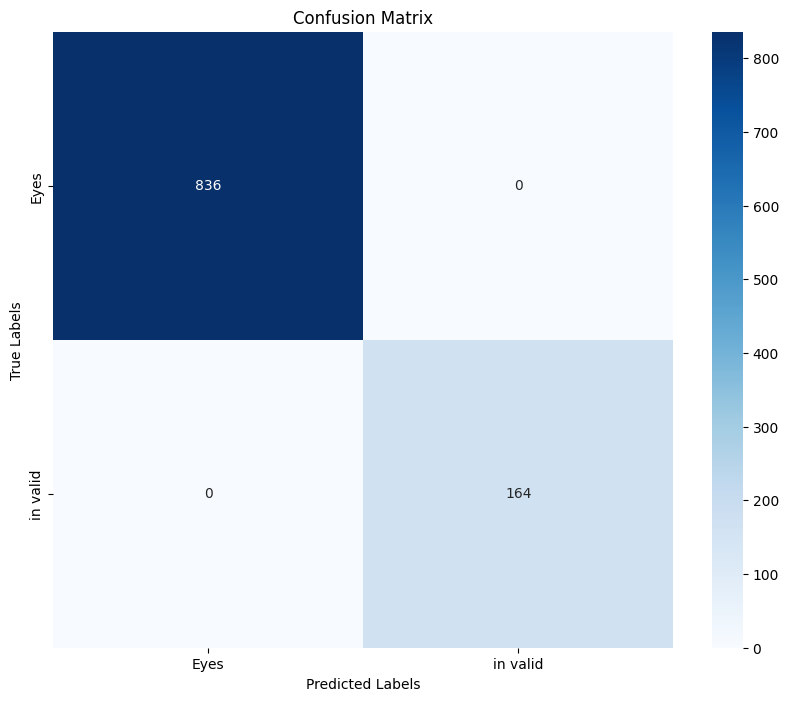

In [4]:
# ================================
# Confusion Matrix and Classification Report
# ================================

# Reset the validation generator to avoid issues with batch alignment
valid_generator.reset()

# Get model predictions on the validation set
predictions = model.predict(valid_generator, verbose=1)

# Convert the predicted probabilities to class indices
predicted_classes = np.argmax(predictions, axis=1)

# Get the true class labels from the validation generator
true_classes = valid_generator.classes

# Map indices to class labels for display
class_labels = list(valid_generator.class_indices.keys())

# Generate the classification report
print("\nClassification Report:\n")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

# Compute the confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()


In [5]:
model.save(os.path.join(DRIVE_MODEL_PATH, 'final_model_weights.keras'))

In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Load your trained model
model_path = "/content/SDS_dataset/final_model_weights.keras"
model = tf.keras.models.load_model(model_path)

# Define image size
img_size = (224, 224)  # Adjust according to your model input size

# Function to predict an image
def predict_image(image_path):
    # Load the image
    image = load_img(image_path, target_size=img_size)
    # Convert the image to a numpy array and scale pixel values
    image = img_to_array(image) / 255.0  # Normalize pixel values to [0, 1]
    image = np.expand_dims(image, axis=0)  # Add batch dimension

    # Make prediction
    predictions = model.predict(image)
    predicted_class = np.argmax(predictions, axis=1)[0]  # Get the class with the highest probability

    return predicted_class

# Predict on an image
image_path = "/content/download.jpg"
predicted_class = predict_image(image_path)
print(f"Predicted class: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step
Predicted class: 1


Number of Correct Predictions: 1000
Number of Incorrect Predictions: 0

Correct Predictions:


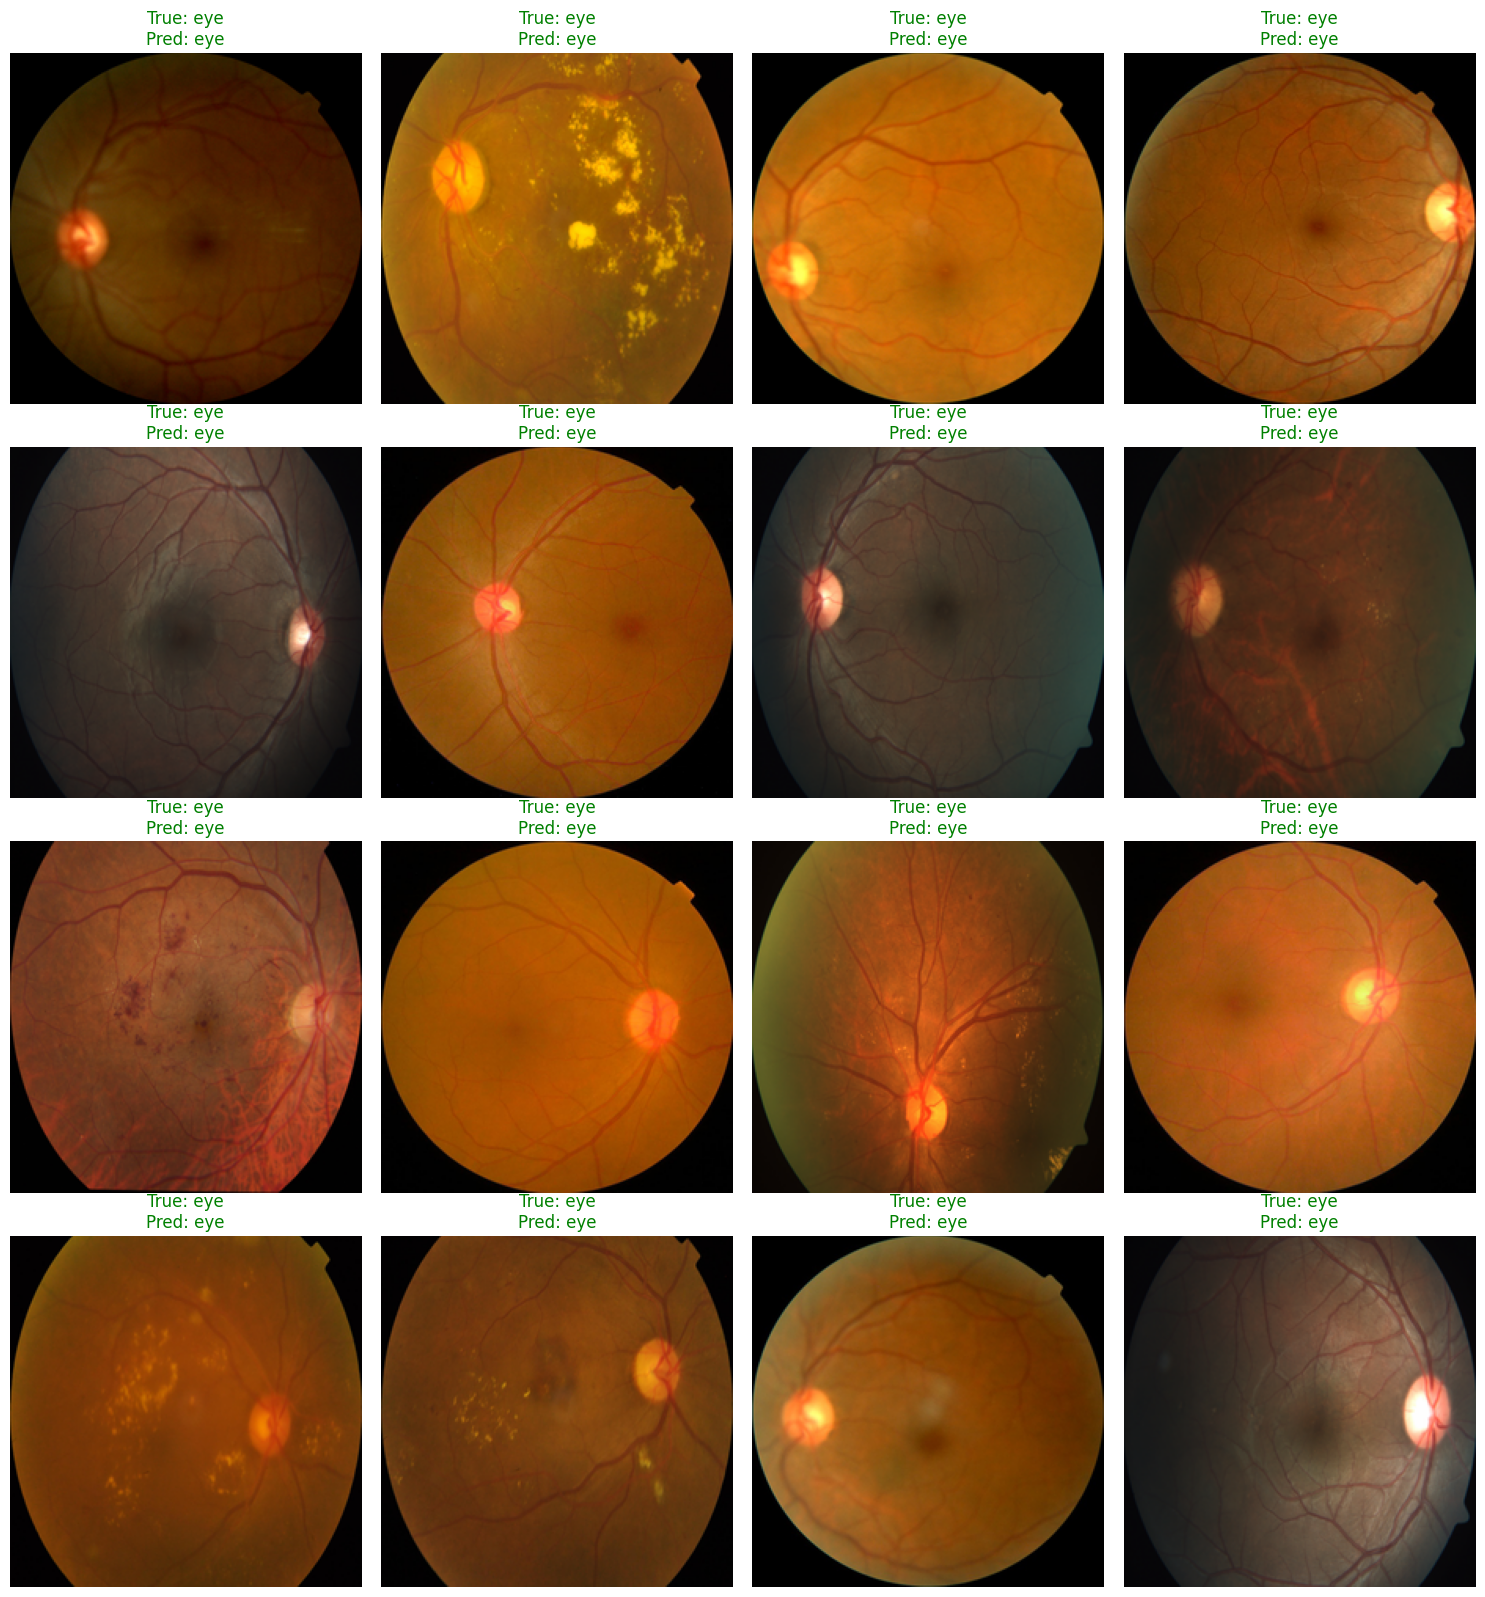


Incorrect Predictions:


<Figure size 1500x1600 with 0 Axes>

In [8]:
# Map class indices to labels
class_labels = {0: "eye", 1: "invalid"}

# Use the mapped labels for visualization
def plot_images(generator, true_classes, predicted_classes, label_mapping, num_images=16):
    """
    Plot a grid of correctly and incorrectly classified images with custom labels.
    """
    correct_indices = [i for i in range(len(true_classes)) if true_classes[i] == predicted_classes[i]]
    incorrect_indices = [i for i in range(len(true_classes)) if true_classes[i] != predicted_classes[i]]

    print(f"Number of Correct Predictions: {len(correct_indices)}")
    print(f"Number of Incorrect Predictions: {len(incorrect_indices)}")

    # Show Correct Predictions
    print("\nCorrect Predictions:")
    plot_grid(generator, correct_indices, true_classes, predicted_classes, label_mapping, num_images=num_images)

    # Show Incorrect Predictions
    print("\nIncorrect Predictions:")
    plot_grid(generator, incorrect_indices, true_classes, predicted_classes, label_mapping, num_images=num_images)


def plot_grid(generator, indices, true_classes, predicted_classes, label_mapping, num_images=16):
    """
    Plot images in a grid format with their true and predicted labels.
    """
    import math

    num_cols = 4
    num_rows = math.ceil(num_images / num_cols)
    plt.figure(figsize=(15, num_rows * 4))

    for i, idx in enumerate(indices[:num_images]):
        # Get the image path from the generator
        image_path = generator.filepaths[idx]

        # Load the image
        image = load_img(image_path, target_size=INPUT_SHAPE[:2])

        plt.subplot(num_rows, num_cols, i + 1)
        plt.imshow(image)
        plt.axis('off')

        # Add labels (true and predicted)
        true_label = label_mapping[true_classes[idx]]
        predicted_label = label_mapping[predicted_classes[idx]]
        plt.title(f"True: {true_label}\nPred: {predicted_label}", color="green" if true_label == predicted_label else "red")

    plt.tight_layout()
    plt.show()

# Call the function to plot correct and incorrect predictions
plot_images(valid_generator, true_classes, predicted_classes, class_labels, num_images=16)


In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Map class indices to labels
class_labels = {0: "eye", 1: "invalid"}

# Define image size
img_size = (224, 224)  # Adjust according to your model input size

# Load your trained model
# If you only saved weights, reload the architecture first
try:
    # If full model was saved
    model_path = "/content/SDS_dataset/final_model.keras"  # Update with the correct path
    model = tf.keras.models.load_model(model_path)
except:
    # If only weights were saved
    model = build_model()  # Ensure the architecture function `build_model` is available
    weights_path = "/content/SDS_dataset/final_model_weights.weights.h5"  # Update with the correct path
    model.load_weights(weights_path)

# Function to predict an image
def predict_image(image_path):
    """
    Predict the class of an image using the loaded model.
    Args:
        image_path (str): Path to the image file.

    Returns:
        str: Predicted class label.
    """
    # Load the image
    image = load_img(image_path, target_size=img_size)

    # Convert the image to a numpy array and scale pixel values
    image = img_to_array(image) / 255.0  # Normalize pixel values to [0, 1]
    image = np.expand_dims(image, axis=0)  # Add batch dimension

    # Make prediction
    predictions = model.predict(image, verbose=0)
    predicted_class = np.argmax(predictions, axis=1)[0]  # Get the class with the highest probability

    # Map class index to label
    predicted_label = class_labels[predicted_class]
    return predicted_label

# Predict on an image
image_path = "/content/download.jpg"  # Update with your image path
predicted_label = predict_image(image_path)
print(f"Predicted class label: {predicted_label}")


Predicted class label: invalid


In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Map class indices to labels
class_labels = {0: "eye", 1: "invalid"}

# Define image size
img_size = (224, 224)  # Adjust according to your model input size

# Load your trained model
# If you only saved weights, reload the architecture first
try:
    # If full model was saved
    model_path = "/content/SDS_dataset/final_model.keras"  # Update with the correct path
    model = tf.keras.models.load_model(model_path)
except:
    # If only weights were saved
    model = build_model()  # Ensure the architecture function `build_model` is available
    weights_path = "/content/SDS_dataset/final_model_weights.weights.h5"  # Update with the correct path
    model.load_weights(weights_path)

# Function to predict an image
def predict_image(image_path):
    """
    Predict the class of an image using the loaded model.
    Args:
        image_path (str): Path to the image file.

    Returns:
        str: Predicted class label.
    """
    # Load the image
    image = load_img(image_path, target_size=img_size)

    # Convert the image to a numpy array and scale pixel values
    image = img_to_array(image) / 255.0  # Normalize pixel values to [0, 1]
    image = np.expand_dims(image, axis=0)  # Add batch dimension

    # Make prediction
    predictions = model.predict(image, verbose=0)
    predicted_class = np.argmax(predictions, axis=1)[0]  # Get the class with the highest probability

    # Map class index to label
    predicted_label = class_labels[predicted_class]
    return predicted_label

# Predict on an image
image_path = "/content/images.jpg"  # Update with your image path
predicted_label = predict_image(image_path)
print(f"Predicted class label: {predicted_label}")


Predicted class label: invalid
